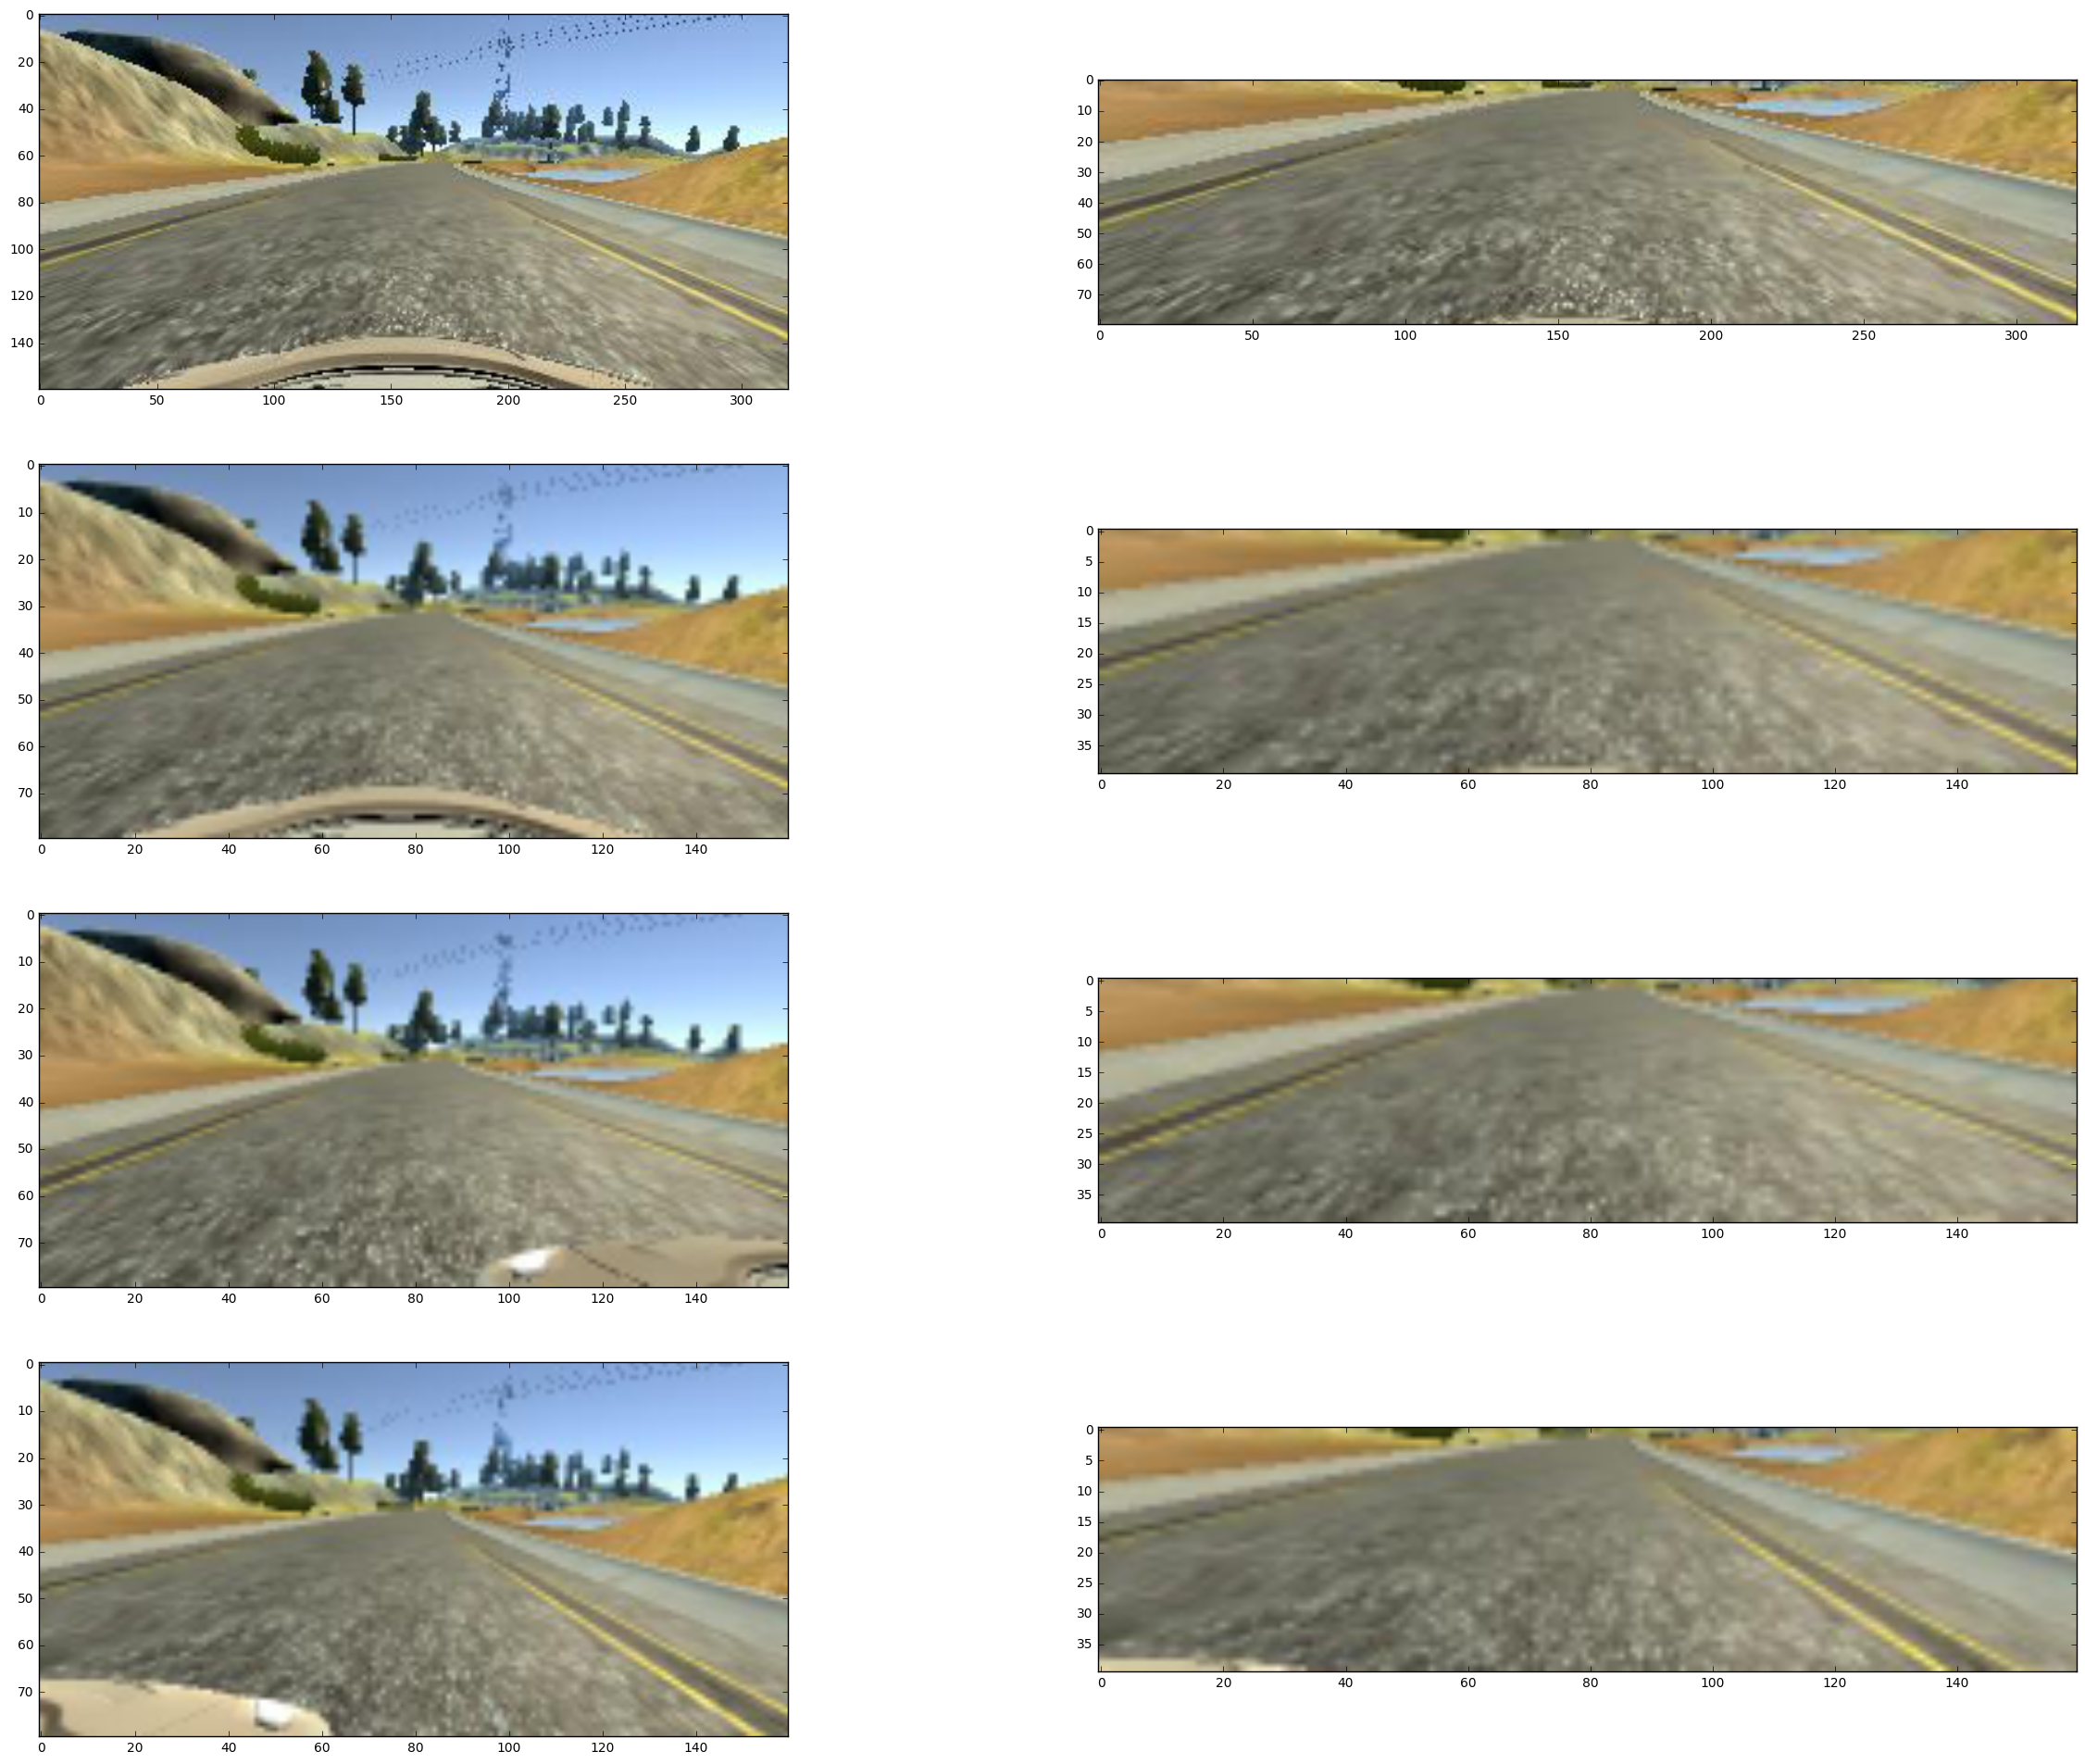

In [5]:
# First, check the effect of preprocessing image (downsampling and cropping).

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import csv
import os
import random
import numpy as np
import cv2

center_samples = []
left_samples = []
right_samples = []
nozero_samples = []
angles = []
aug_angles = []
with open(os.path.join('data', 'driving_log.csv')) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        if line[0] == 'center': continue
        center_samples.append(os.path.join('data', 'IMG', line[0].split('/')[-1]))
        left_samples.append(os.path.join('data', 'IMG', line[1].split('/')[-1]))
        right_samples.append(os.path.join('data', 'IMG', line[2].split('/')[-1]))
        
        if float(line[3]) == 0: continue
        nozero_samples.append(center_samples[-1])
        # Original angle.
        angles.append(float(line[3]))
        # Augmented angle due to using left/right camera and flipping.
        aug_angles.append(-float(line[3]))
        aug_angles.append(float(line[3]) + 0.2)
        aug_angles.append(float(line[3]) - 0.2)

for ind in range(0, 1):
    i = random.randint(0, len(center_samples))
    (fig, axes) = plt.subplots(4, 2, figsize=(30, 24))
    fig = plt.figure()
    image = cv2.resize(mpimg.imread(center_samples[i]), None, fx=1, fy=1)
    axes[0, 0].imshow(image)
    axes[0, 1].imshow(np.array(image)[60:-20, :, :])
    
    image = cv2.resize(mpimg.imread(center_samples[i]), None, fx=0.5, fy=0.5)
    axes[1, 0].imshow(image)
    axes[1, 1].imshow(np.array(image)[30:-10, :, :])
    
    image = cv2.resize(mpimg.imread(left_samples[i]), None, fx=0.5, fy=0.5)
    axes[2, 0].imshow(image)
    axes[2, 1].imshow(np.array(image)[30:-10, :, :])
    
    image = cv2.resize(mpimg.imread(right_samples[i]), None, fx=0.5, fy=0.5)
    axes[3, 0].imshow(image)
    axes[3, 1].imshow(np.array(image)[30:-10, :, :])

Original Positive:  1900 , negative:  1775 , equal:  0 , total:  32.703659705
Augmented Positive:  5381 , negative:  5644 , equal:  0 , total:  32.703659705
Original:
Percent:  0 , value:  -0.9426954
Percent:  10 , value:  -0.2211613
Percent:  20 , value:  -0.1452064
Percent:  30 , value:  -0.0787459
Percent:  40 , value:  -0.05975719
Percent:  50 , value:  0.01391724
Percent:  60 , value:  0.0617599
Percent:  70 , value:  0.1096026
Percent:  80 , value:  0.1670138
Percent:  90 , value:  0.2148564
Percent:  100 , value:  1.0
Augmented:
Percent:  0 , value:  -1.1426954
Percent:  10 , value:  -0.3105417
Percent:  20 , value:  -0.202791043
Percent:  30 , value:  -0.1382401
Percent:  40 , value:  -0.0712604
Percent:  50 , value:  -0.0138492
Percent:  60 , value:  0.06925154
Percent:  70 , value:  0.135712
Percent:  80 , value:  0.22348577
Percent:  90 , value:  0.3383082
Percent:  100 , value:  1.2


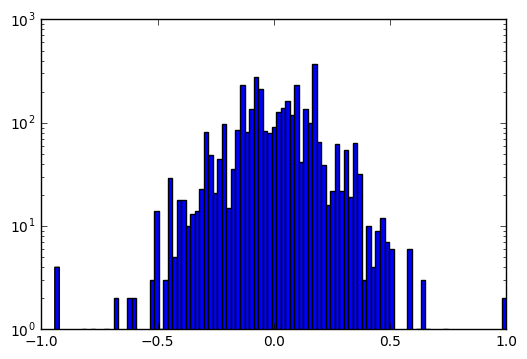

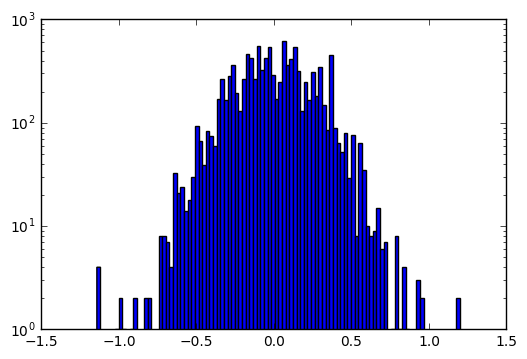

In [20]:
# Next, look at the distribution of steering angles pre- and post augmentation.
import pandas as pd

fig = plt.figure()
plt.hist(angles, bins=100, log=True)
fig = plt.figure()
plt.hist(aug_angles, bins=100, log=True)

print('Original',
      'Positive: ', sum(np.greater(angles, 0)),
      ', negative: ', sum(np.less(angles, 0)),
      ', equal: ', sum(np.equal(angles, 0)),
      ', total: ', np.sum(angles))

print('Augmented',
      'Positive: ', sum(np.greater(aug_angles, 0)),
      ', negative: ', sum(np.less(aug_angles, 0)),
      ', equal: ', sum(np.equal(aug_angles, 0)),
      ', total: ', np.sum(aug_angles))

print('Original:')
for i in range(0, 110, 10):
    print('Percent: ', i, ', value: ', np.percentile(angles, i))

print('Augmented:')
for i in range(0, 110, 10):
    print('Percent: ', i, ', value: ', np.percentile(aug_angles, i))

In [26]:
# Finally, look at the distribution of predictions.
from keras.models import load_model
import cv2

model = load_model('model_nozero_adj0.2_vs0.2_tl_e25.h5')
preds = []
for img in nozero_samples:
    image_array = cv2.resize(cv2.imread(img), None, fx=0.5, fy=0.5)
    preds.append(float(model.predict(image_array[None, 20:-10, :, :], batch_size=1)))

Predictions Positive:  1839 , negative:  1836 , equal:  0 , total:  -28.9678757237
Predictions:
Percent:  0 , value:  -0.575996637344
Percent:  10 , value:  -0.158597001433
Percent:  20 , value:  -0.111857177317
Percent:  30 , value:  -0.082859736681
Percent:  40 , value:  -0.0561712749302
Percent:  50 , value:  0.000281569315121
Percent:  60 , value:  0.0511358432472
Percent:  70 , value:  0.078364084661
Percent:  80 , value:  0.0998330593109
Percent:  90 , value:  0.127529221773
Percent:  100 , value:  0.641676485538


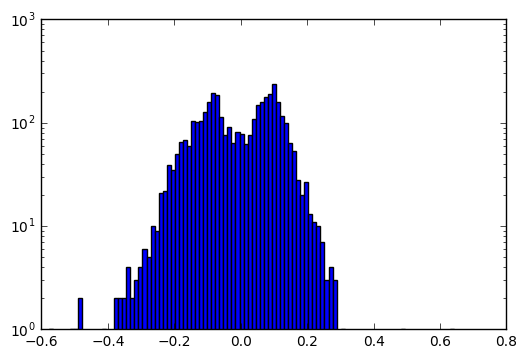

In [27]:
fig = plt.figure()
plt.hist(preds, bins=100, log=True)

print('Predictions',
      'Positive: ', sum(np.greater(preds, 0)),
      ', negative: ', sum(np.less(preds, 0)),
      ', equal: ', sum(np.equal(preds, 0)),
      ', total: ', np.sum(preds))

print('Predictions:')
for i in range(0, 110, 10):
    print('Percent: ', i, ', value: ', np.percentile(preds, i))